In [1]:
# IMPORT
import os
import datetime
import math
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
    
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
###
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [2]:
# DATA
df1 = pd.read_csv('data_day.csv')
df2 = pd.read_csv('data_2018-08-05_2021-04-30.csv')
df3 = pd.read_csv('data_2018-05-05_2018-08-04.csv')
df4 = pd.read_csv('data_2015-08-09_2018-05-04.csv')
df5 = pd.read_csv('data_2013-02-12_2015-08-08.csv')
df6 = pd.read_csv('data_2010-05-19_to_2013-02-11.csv')
df7 = pd.read_csv('data_2007-08-23_to_2010-05-18.csv')
df8 = pd.read_csv('data_2004-11-26_to_2007-08-22.csv')
df = pd.concat([df6, df5, df4, df3, df2, df1])
df.index = range(0,4996)
df.tail()

date_time = pd.concat([pd.to_datetime(df['datetime'][0:4000]),pd.to_datetime(df['datetime'][4000:])])
df = df[['temp','tempmax', 'tempmin','humidity', 'precip', 'windspeed', 'solarradiation', 'solarenergy']]
print(df)

      temp  tempmax  tempmin  humidity  precip  windspeed  solarradiation  \
0     30.8     36.5     26.0      78.1   0.000       20.5           301.4   
1     31.3     36.4     27.0      76.0   0.300       24.1           281.5   
2     30.7     39.0     26.0      76.1   2.300       40.7           237.1   
3     31.5     39.6     26.0      71.2   0.800       15.1           296.8   
4     27.6     30.8     25.8      80.1  33.000       22.7           240.8   
...    ...      ...      ...       ...     ...        ...             ...   
4991  20.5     22.0     19.5      93.8   8.794       17.5           148.7   
4992  22.4     26.5     20.0      84.5   0.683       19.4           140.8   
4993  22.6     26.6     20.0      85.5   0.072       20.3           131.9   
4994  23.0     26.0     19.0      82.4   3.300       20.5            63.7   
4995  16.0     18.0     14.0      91.4   3.400       22.3            15.8   

      solarenergy  
0            26.1  
1            24.3  
2            20

In [ ]:
###
df = pd.read_csv(csv_path)
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [ ]:
###
df.columns
timestamp_s = date_time.map(pd.Timestamp.timestamp)
df = df[['p (mbar)', 'T (degC)', 'rh (%)']]

In [3]:
df.columns

Index(['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed',
       'solarradiation', 'solarenergy'],
      dtype='object')

In [31]:
###
timestamp_s = date_time.map(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [66]:
# POP DATA
# try:
#     df.pop('datetime')
# except:
#     print("time popped")
# try:
#     df.pop('name')
# except:
#     print("name popped")
count = 0
for name in df.columns:
    print(f"{name}: {df[name][0]} {type(df[name][0])}")
    if ((not isinstance(df[name][0],(int,float))) or pd.isnull(df[name][0])):
        try:
            df.pop(name)
        except:
            print(f"{name} is popped")
print(count)
df.columns

temp: 30.8 <class 'numpy.float64'>
tempmax: 36.5 <class 'numpy.float64'>
tempmin: 26.0 <class 'numpy.float64'>
humidity: 78.1 <class 'numpy.float64'>
precip: 0.0 <class 'numpy.float64'>
windspeed: 20.5 <class 'numpy.float64'>
solarradiation: 301.4 <class 'numpy.float64'>
solarenergy: 26.1 <class 'numpy.float64'>
0


Index(['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed',
       'solarradiation', 'solarenergy'],
      dtype='object')

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

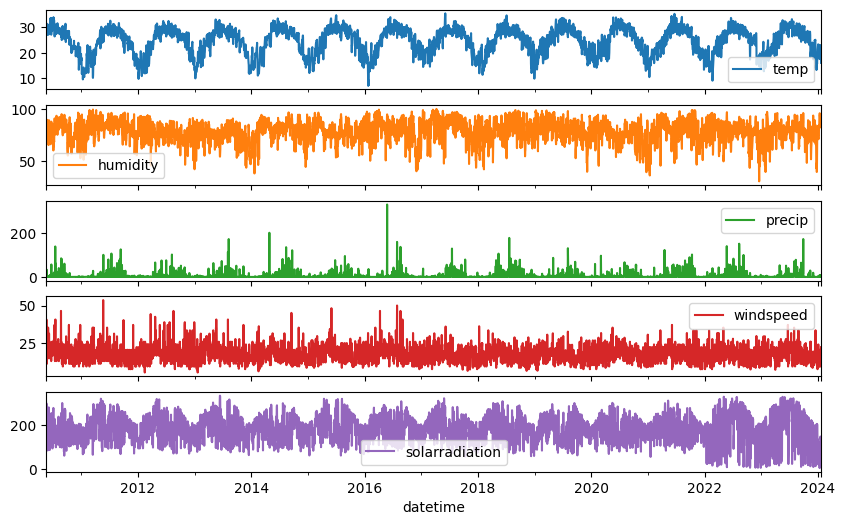

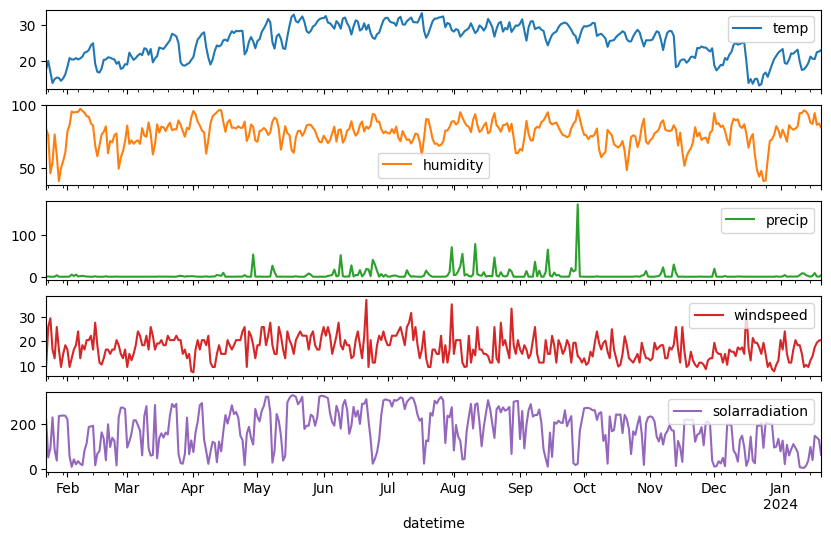

In [4]:
# EVOLUTION OF SOME FEATURES
# plot_cols = ['Temp (degC)', 'Humidity (%)', 'Precipitation (mm)', 'Windspeed (m/s)', 'Solarradiation (kWh/m2)']
plot_cols = ['temp', 'humidity', 'precip', 'windspeed', 'solarradiation']
plot_features = df[plot_cols]

# Change index to date_time
plot_features.index = date_time
plot_features.plot(subplots=True)

plot_features = df[plot_cols][-365:-1]
plot_features.index = date_time[-365:-1]
plot_features.plot(subplots=True)

In [5]:
# STATISTIC OF DATASET
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,4996.0,24.600941,5.269526,7.0,20.7,25.9000,28.80000,35.500
tempmax,4996.0,28.136749,5.986670,8.0,24.0,29.0000,33.00000,41.700
tempmin,4996.0,21.665472,4.999764,3.8,18.0,23.0000,25.90000,31.000
humidity,4996.0,78.081966,10.465774,31.1,72.2,79.4000,85.32500,100.000
precip,4996.0,4.817242,14.841980,0.0,0.0,0.2165,2.26875,331.243
windspeed,4996.0,17.482706,5.234067,5.4,13.9,16.6000,20.50000,53.600
solarradiation,4996.0,183.243695,60.721767,5.9,139.1,186.1000,227.12500,333.500
solarenergy,4996.0,15.810528,5.250880,0.5,12.0,16.0500,19.60000,28.900


In [6]:
# TIMESTAMP

# Map values of Series according to an input mapping or function.
# Used for substituting each value in a Series with another value, that may be derived from a function, 
# a dict or a Series.
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s[1] - timestamp_s[0]


86400.0

The time in seconds is not a useful model input. Being weather data, it has clear daily and yearly periodicity. There are many ways you could deal with periodicity.

You can get usable signals by using sine and cosine transforms to clear "Time of day" and "Time of year" signals

This gives the model access to the most important frequency features. In this case you knew ahead of time which frequencies were important

Index(['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed',
       'solarradiation', 'solarenergy', 'Year sin', 'Year cos'],
      dtype='object')

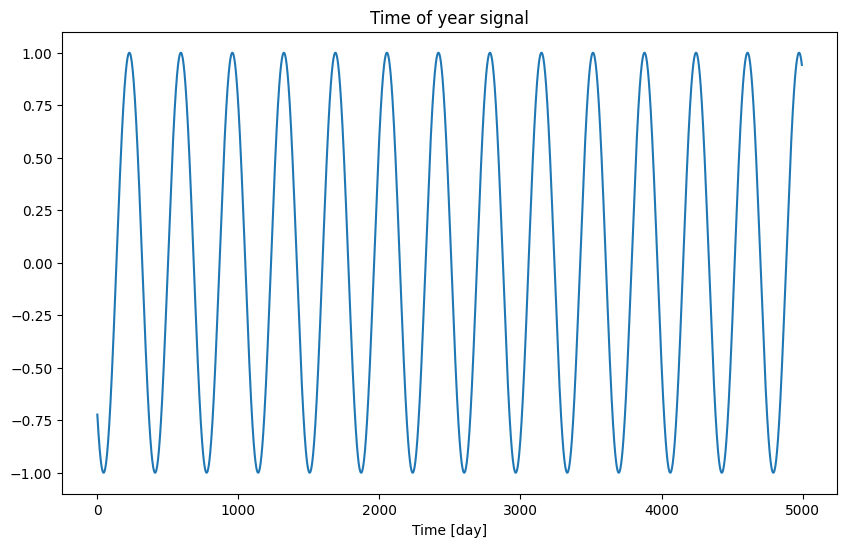

In [7]:
# PERIOD TIME

day = 24*60*60
year = (365.2425)*day
# df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
# df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

# plt.plot(np.array(df['Year sin'])[:366])
plt.plot(np.array(df['Year cos'])[:])
plt.xlabel('Time [day]')
plt.title('Time of year signal')
df.columns

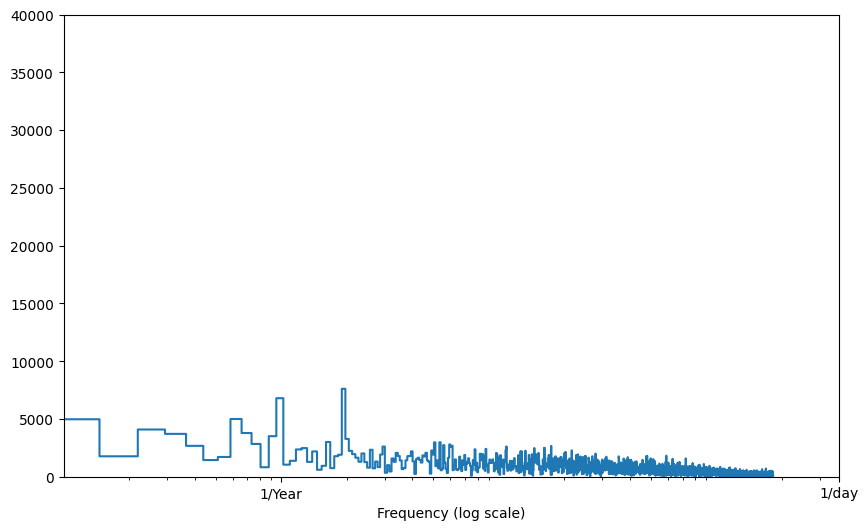

In [8]:
fft = tf.signal.rfft(df['humidity'])
f_per_dataset = np.arange(0, len(fft))

n_samples_day = len(df['humidity'])
days_per_year = 365.2524
years_per_dataset = n_samples_day/(days_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 40000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [9]:
# LET features be key, value is the index of feature
input_column_indices = {name: i for i, name in enumerate(df.columns)}
print(input_column_indices)

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]
test_save = test_df.copy()
date_train = date_time[0:int(n*0.7)]
date_val = date_time[int(n*0.7):int(n*0.9)]
date_test = date_time[int(n*0.9):]
num_features = df.shape[1]

print(train_df)

{'temp': 0, 'tempmax': 1, 'tempmin': 2, 'humidity': 3, 'precip': 4, 'windspeed': 5, 'solarradiation': 6, 'solarenergy': 7, 'Year sin': 8, 'Year cos': 9}
      temp  tempmax  tempmin  humidity  precip  windspeed  solarradiation  \
0     30.8     36.5     26.0      78.1     0.0       20.5           301.4   
1     31.3     36.4     27.0      76.0     0.3       24.1           281.5   
2     30.7     39.0     26.0      76.1     2.3       40.7           237.1   
3     31.5     39.6     26.0      71.2     0.8       15.1           296.8   
4     27.6     30.8     25.8      80.1    33.0       22.7           240.8   
...    ...      ...      ...       ...     ...        ...             ...   
3492  15.3     23.0      9.5      61.4     0.0       10.3           205.7   
3493  15.7     23.0     10.0      65.6     0.0       10.9           198.6   
3494  16.9     24.0     11.0      65.9     0.0       13.0           192.1   
3495  19.1     24.1     14.5      74.2     0.0       10.3           141.1   


In [10]:
# The mean and standard deviation should only be computed using the training data 
# so that the models have no access to the values in the validation and test sets.
print(train_df)
train_mean = train_df.mean()
train_std = train_df.std()

print(train_mean)
print(train_std)
def normalize(data):
    data_norm = (data - train_mean)/train_std
    return data_norm
def unnorm(data):
    data_unnorm = (data * train_std) + train_mean
    return data_unnorm
train_df = normalize(train_df)
val_df = normalize(val_df)
test_df = normalize(test_df)
print(train_mean.shape)
print(train_std.shape)

      temp  tempmax  tempmin  humidity  precip  windspeed  solarradiation  \
0     30.8     36.5     26.0      78.1     0.0       20.5           301.4   
1     31.3     36.4     27.0      76.0     0.3       24.1           281.5   
2     30.7     39.0     26.0      76.1     2.3       40.7           237.1   
3     31.5     39.6     26.0      71.2     0.8       15.1           296.8   
4     27.6     30.8     25.8      80.1    33.0       22.7           240.8   
...    ...      ...      ...       ...     ...        ...             ...   
3492  15.3     23.0      9.5      61.4     0.0       10.3           205.7   
3493  15.7     23.0     10.0      65.6     0.0       10.9           198.6   
3494  16.9     24.0     11.0      65.9     0.0       13.0           192.1   
3495  19.1     24.1     14.5      74.2     0.0       10.3           141.1   
3496  19.8     24.2     15.5      82.5     0.0       10.3           183.8   

      solarenergy  Year sin  Year cos  
0            26.1  0.690694 -0.7231

C:\Users\tridu\AppData\Local\Temp\ipykernel_8112\1817376617.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.keys(), rotation=90)


[Text(0, 0, 'temp'),
 Text(1, 0, 'tempmax'),
 Text(2, 0, 'tempmin'),
 Text(3, 0, 'humidity'),
 Text(4, 0, 'precip'),
 Text(5, 0, 'windspeed'),
 Text(6, 0, 'solarradiation'),
 Text(7, 0, 'solarenergy'),
 Text(8, 0, 'Year sin'),
 Text(9, 0, 'Year cos')]

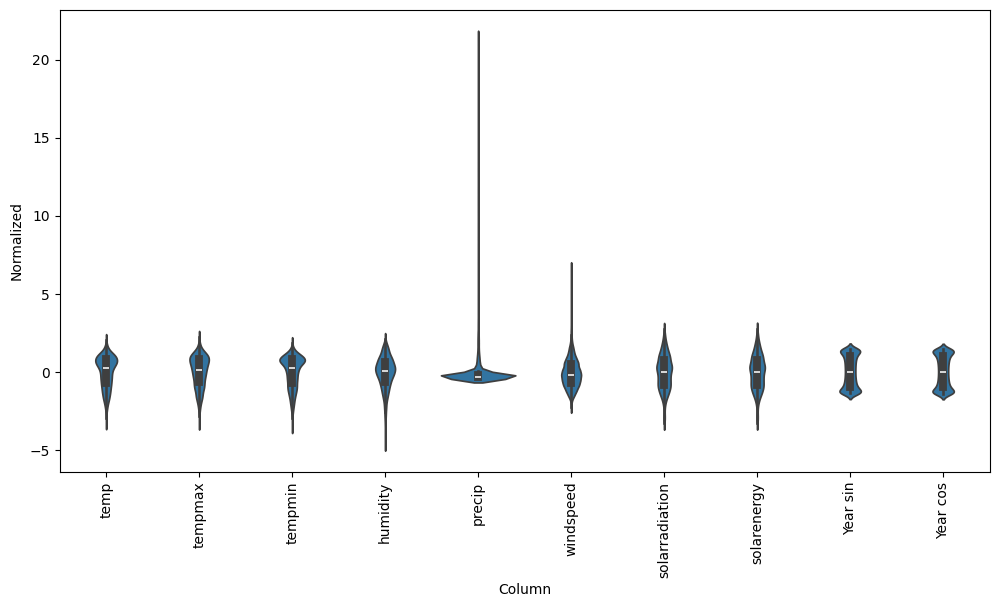

In [11]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
ax.set_xticklabels(df.keys(), rotation=90)

In [12]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


In [13]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [14]:
def plot(self, model=None, plot_col='humidity', max_subplots=4):
    inputs, labels = self.example
    plt.figure(figsize=(20, 20))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue
        try:
            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
        except:
            print("not 1")
        if model is not None:
            predictions = model(inputs)
            try:
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                            marker='X', edgecolors='k', label='Predictions',
                            c='#ff7f0e', s=64)

            except:
                print("not 2")
        else:
            print("BUGGGGGG")

        if n == 0:
            plt.legend()

    plt.xlabel('Time [day]')
    if model is not None:
        predictions = model(inputs)
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.scatter(labels[:, :, label_col_index],
                   predictions[:, :, label_col_index])


WindowGenerator.plot = plot

In [15]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [16]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.test))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [80]:
# Window
window = WindowGenerator(
    input_width=60, label_width=60, shift=1,
    label_columns=['humidity'])
#  input_columns=['humidity','temp','precip','windspeed','solarradiation']

In [81]:
# Linear Model
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [82]:
print('Input shape:', window.example[0].shape)
print('Output shape:', linear(window.example[0]).shape)


Input shape: (32, 60, 10)
Output shape: (32, 60, 1)


In [18]:
val_performance = {}
performance = {}
data_train = 'temp'

In [17]:
MAX_EPOCHS = 200
def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.keras.optimizers.Lion(),
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.val,)
                        # callbacks=[early_stopping])
    return history


In [46]:
history = compile_and_fit(linear, window)

val_performance['Linear'] = linear.evaluate(window.val)
performance['Linear'] = linear.evaluate(window.test, verbose=0)

NameError: name 'linear' is not defined

In [ ]:
window.plot(linear)

BUGGGGGG
BUGGGGGG
BUGGGGGG
BUGGGGGG
humidity


Total window size: 379
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

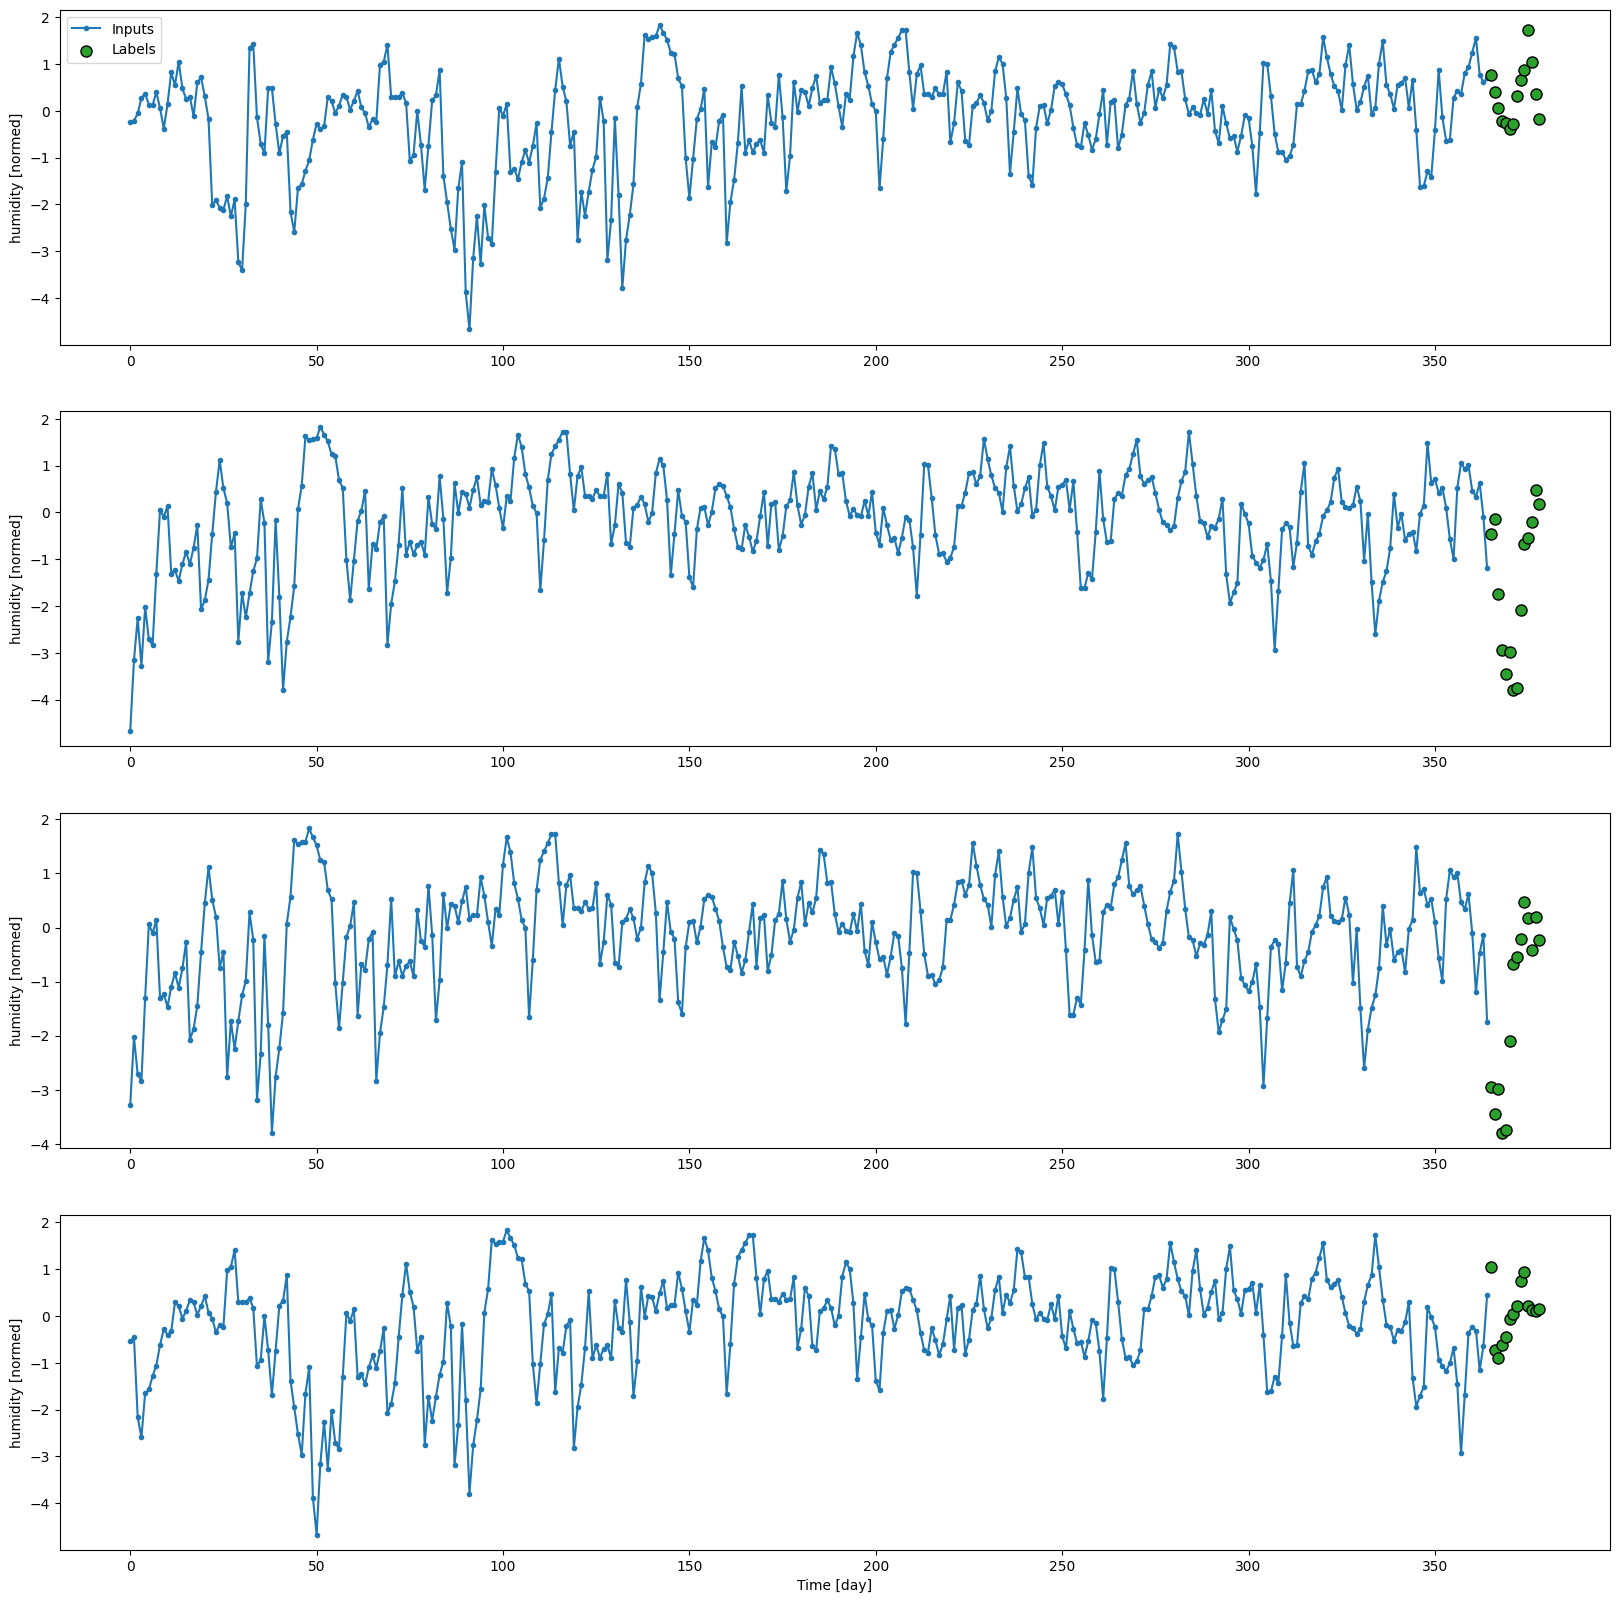

In [19]:
OUT_STEPS = 14
data_train = ['humidity']
multi_window = WindowGenerator(input_width = 365,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS, label_columns=data_train)

multi_window.plot(plot_col=data_train[0])
print(data_train[0])
multi_window

In [20]:
multi_val_performance = {}
multi_performance = {}

In [21]:
def statistic(models):
    count = 1
    for example_inputs, example_labels in multi_window.test.take(4):
        print(f"Example: {count}")
        count += 1
        for model in models:
            prediction = model(example_inputs)
            print("MAE")
            for i in range(10):
                print("{:.2f}".format(mean_absolute_error(prediction[:,i,0],example_labels[:,i,0])), end=" ")
            print()
            print("CORRELATION")
            for i in range(10):
                print("{:.2f}".format(np.corrcoef(prediction[:,i,0], example_labels[:,i,0])[1,0]), end = " ")
            print()

In [22]:
df.isnull().values.any()

False

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0009 - mean_absolute_error: 0.7481 


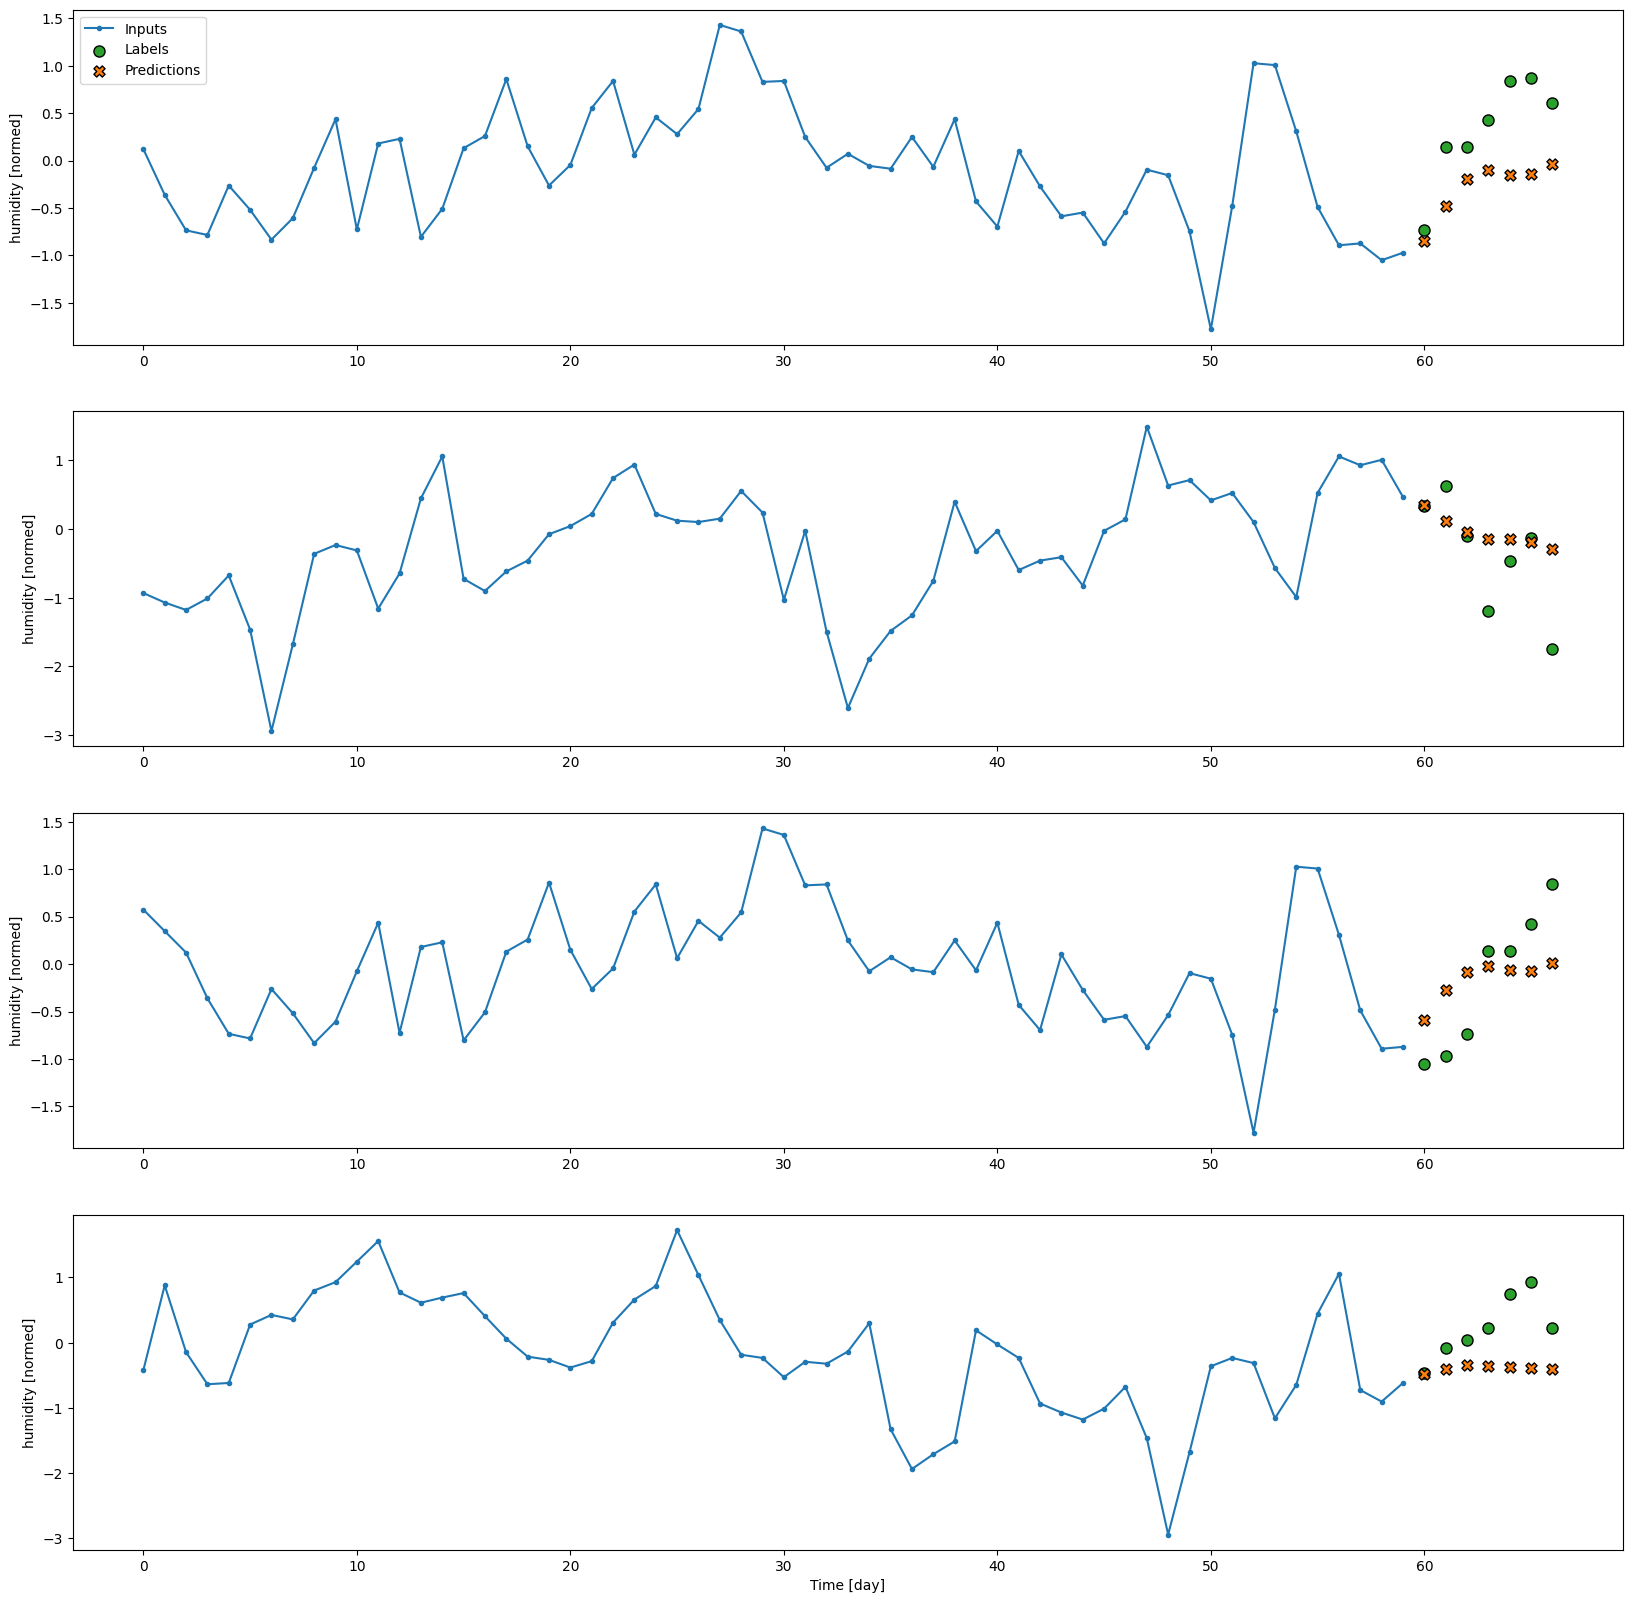

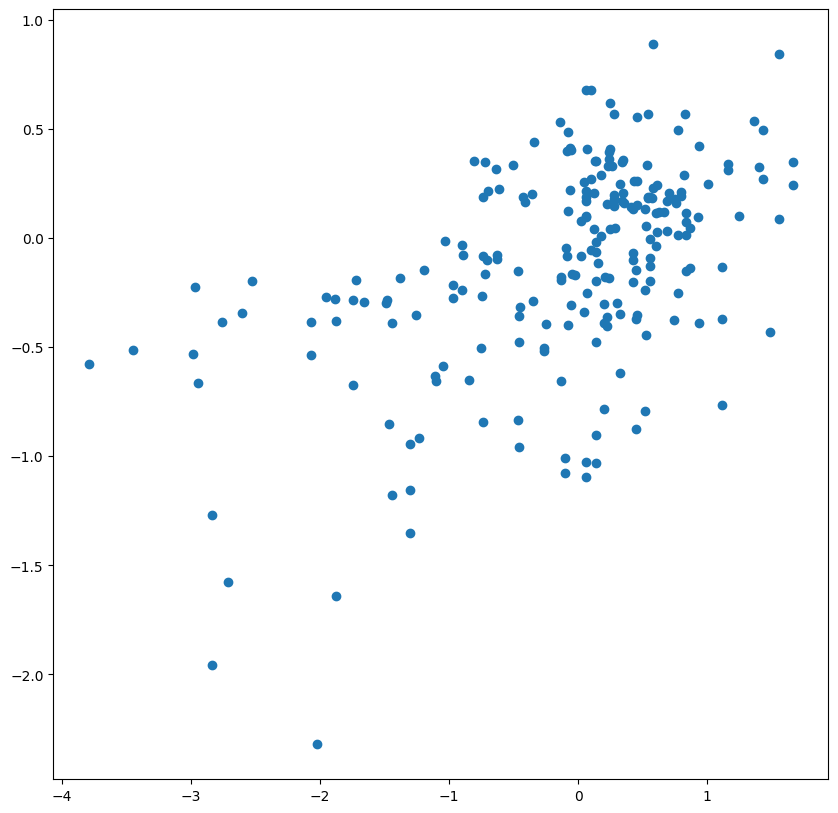

In [89]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model, plot_col=data_train[0])

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9249 - mean_absolute_error: 0.9430 


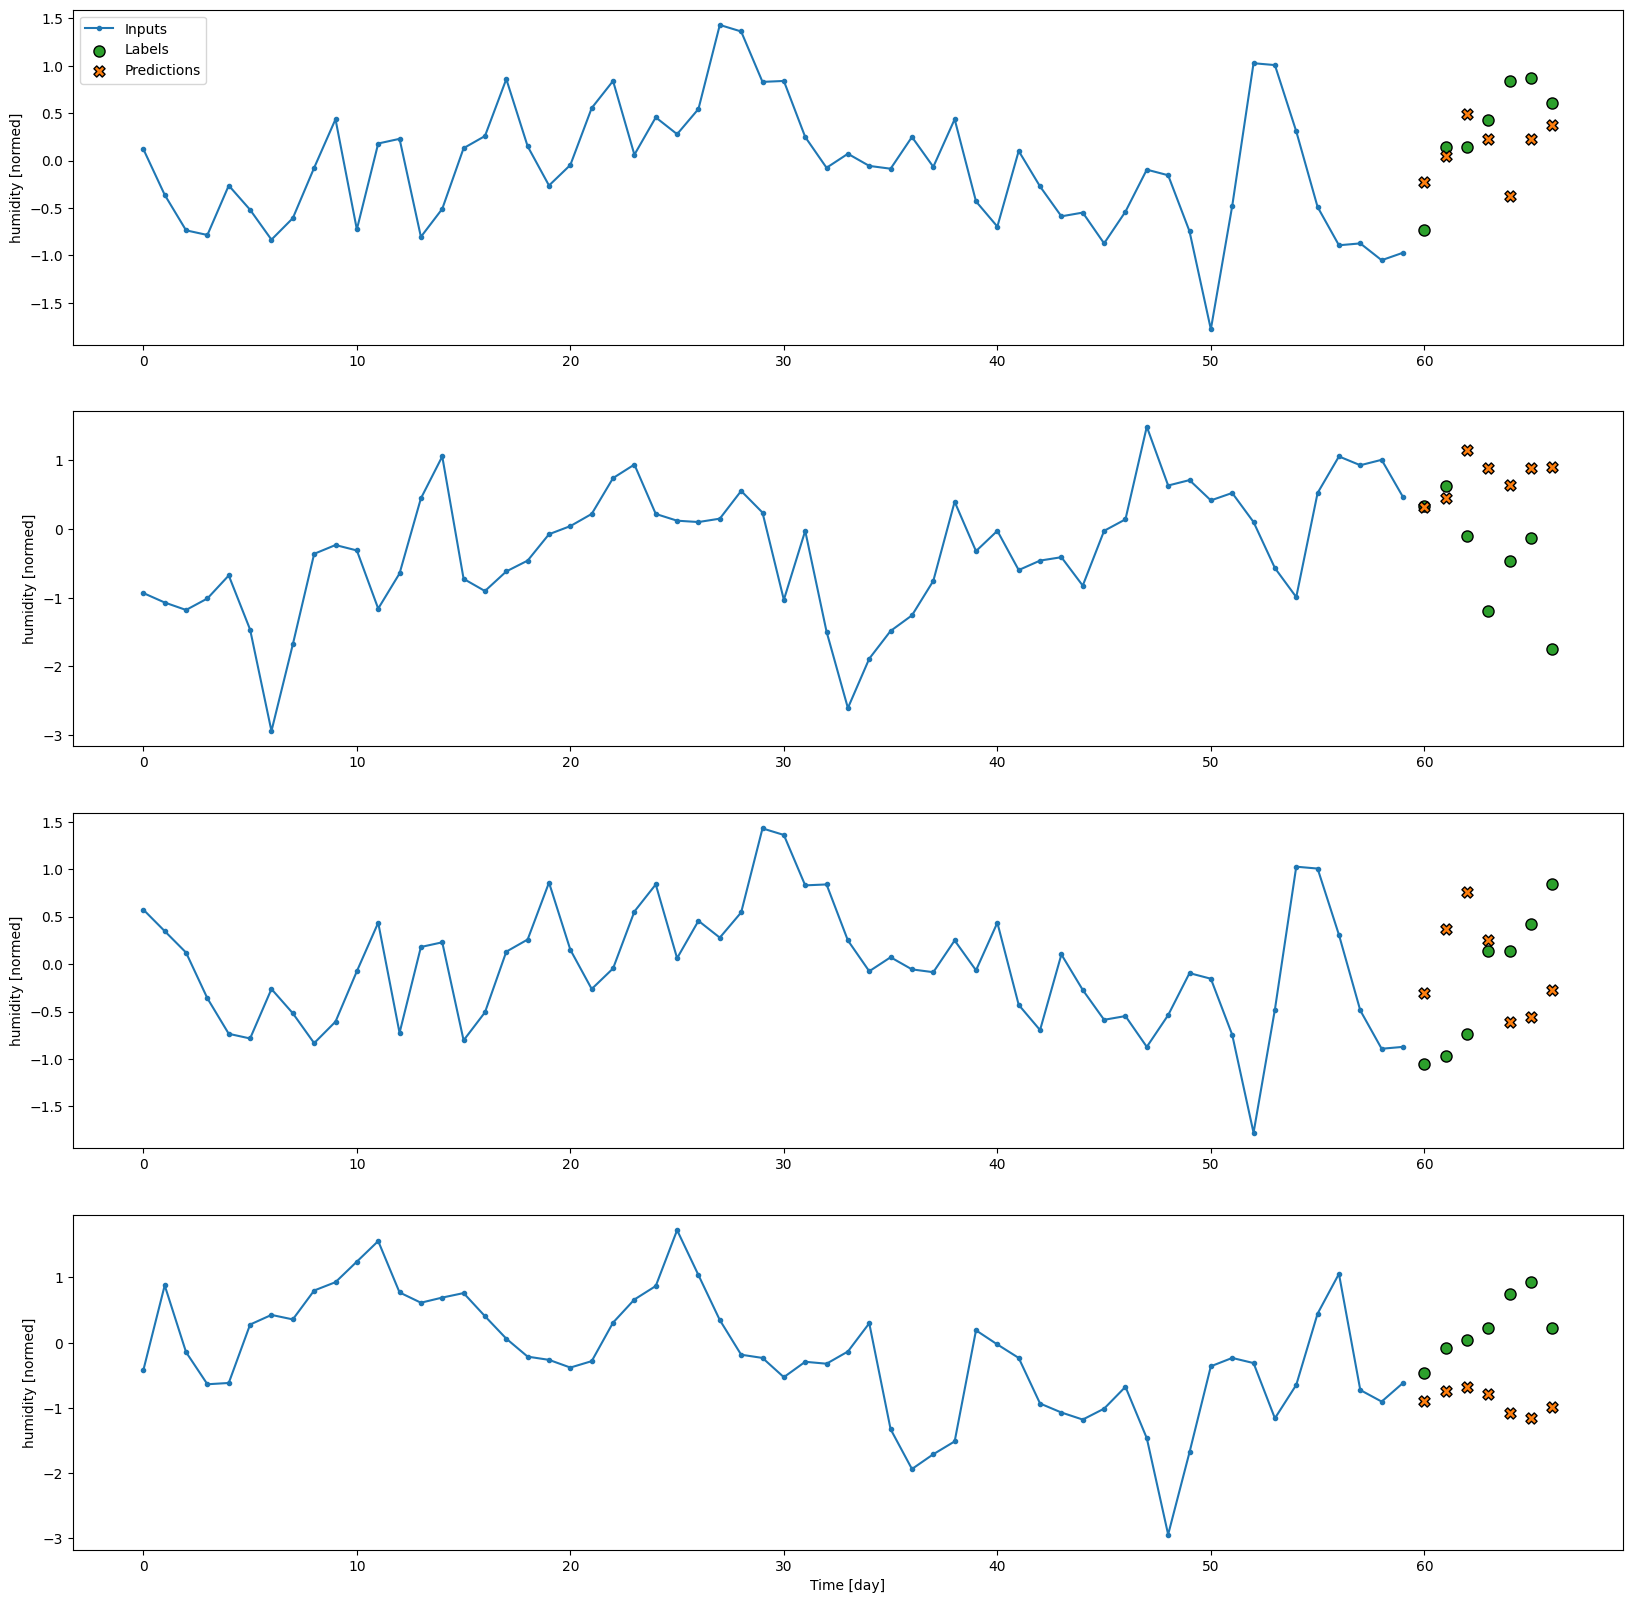

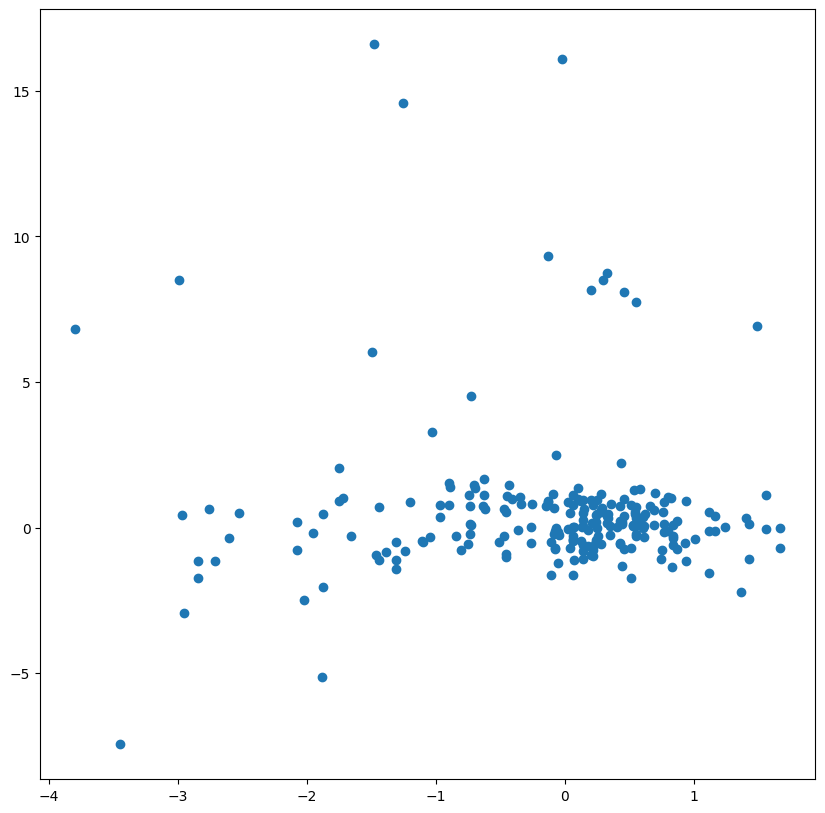

In [90]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model, plot_col=data_train[0])



In [91]:
CONV_WIDTH = 10
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(64, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)


Epoch 1/500
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9031 - mean_absolute_error: 0.7417 - val_loss: 1.0302 - val_mean_absolute_error: 0.7665
Epoch 2/500
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7717 - mean_absolute_error: 0.6750 - val_loss: 0.9811 - val_mean_absolute_error: 0.7441
Epoch 3/500
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7379 - mean_absolute_error: 0.6599 - val_loss: 0.9952 - val_mean_absolute_error: 0.7450
Epoch 4/500
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7038 - mean_absolute_error: 0.6465 - val_loss: 0.9704 - val_mean_absolute_error: 0.7438
Epoch 5/500
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6960 - mean_absolute_error: 0.6395 - val_loss: 0.9814 - val_mean_absolute_error: 0.7578
Epoch 6/500
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6788 - mean_absolute_error: 0.6340 - val_loss: 0.9769 - val_mean_absolute_error: 0.7480
Epoch 7/500
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6681 - mean_absolute_error: 0.6

KeyboardInterrupt: 

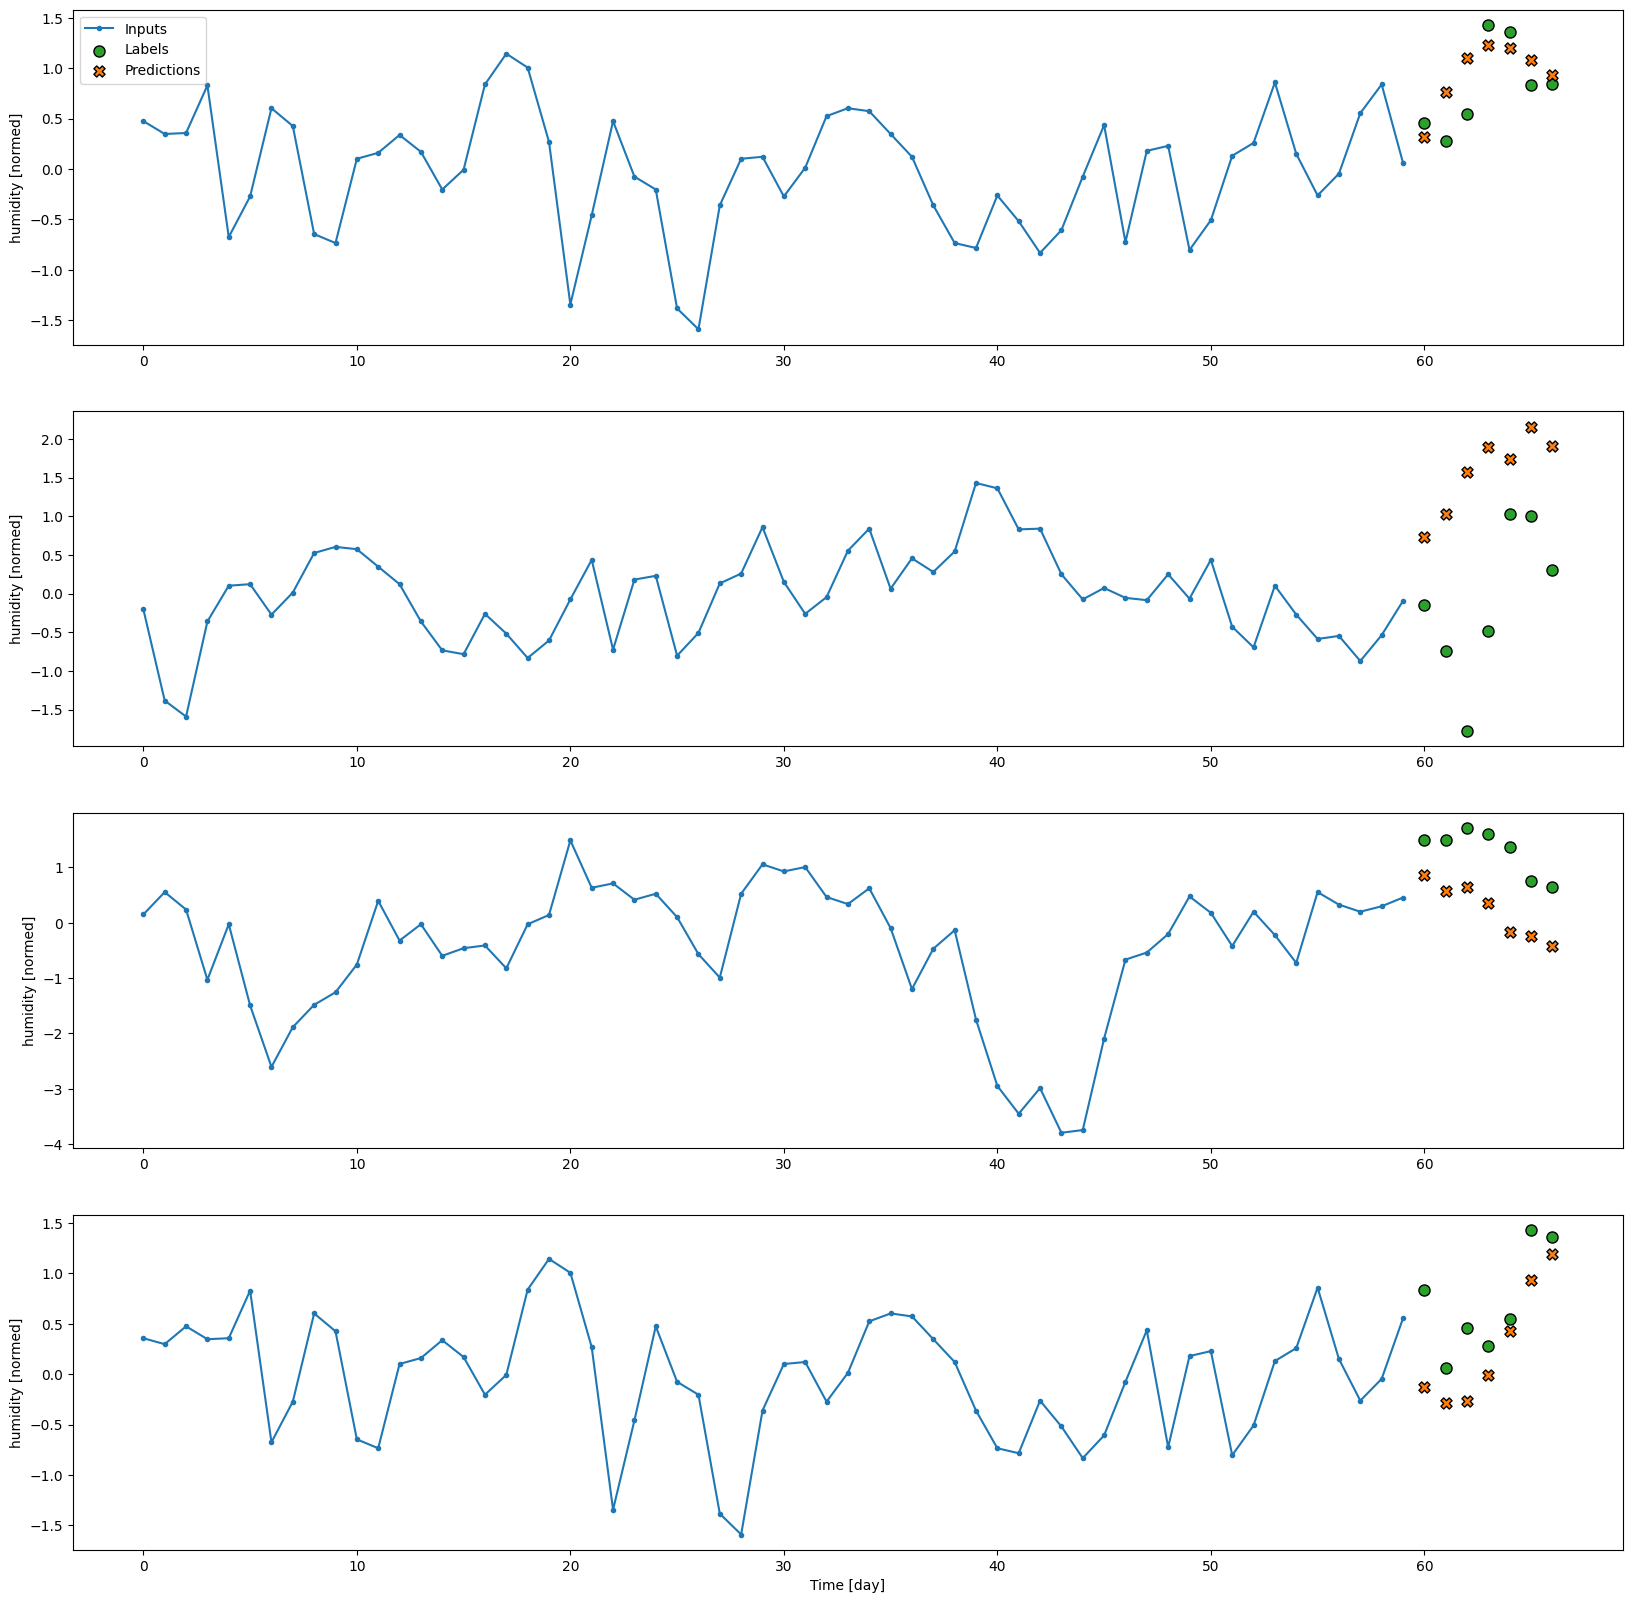

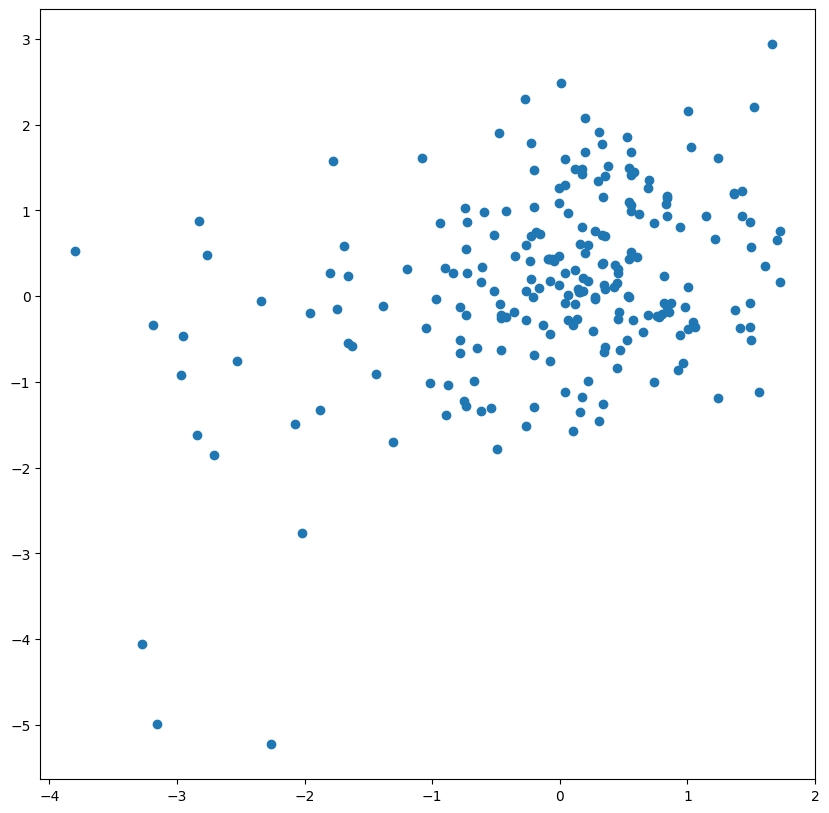

In [36]:
multi_window.plot(multi_conv_model, plot_col=data_train[0])

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 1.2794 - mean_absolute_error: 0.8667


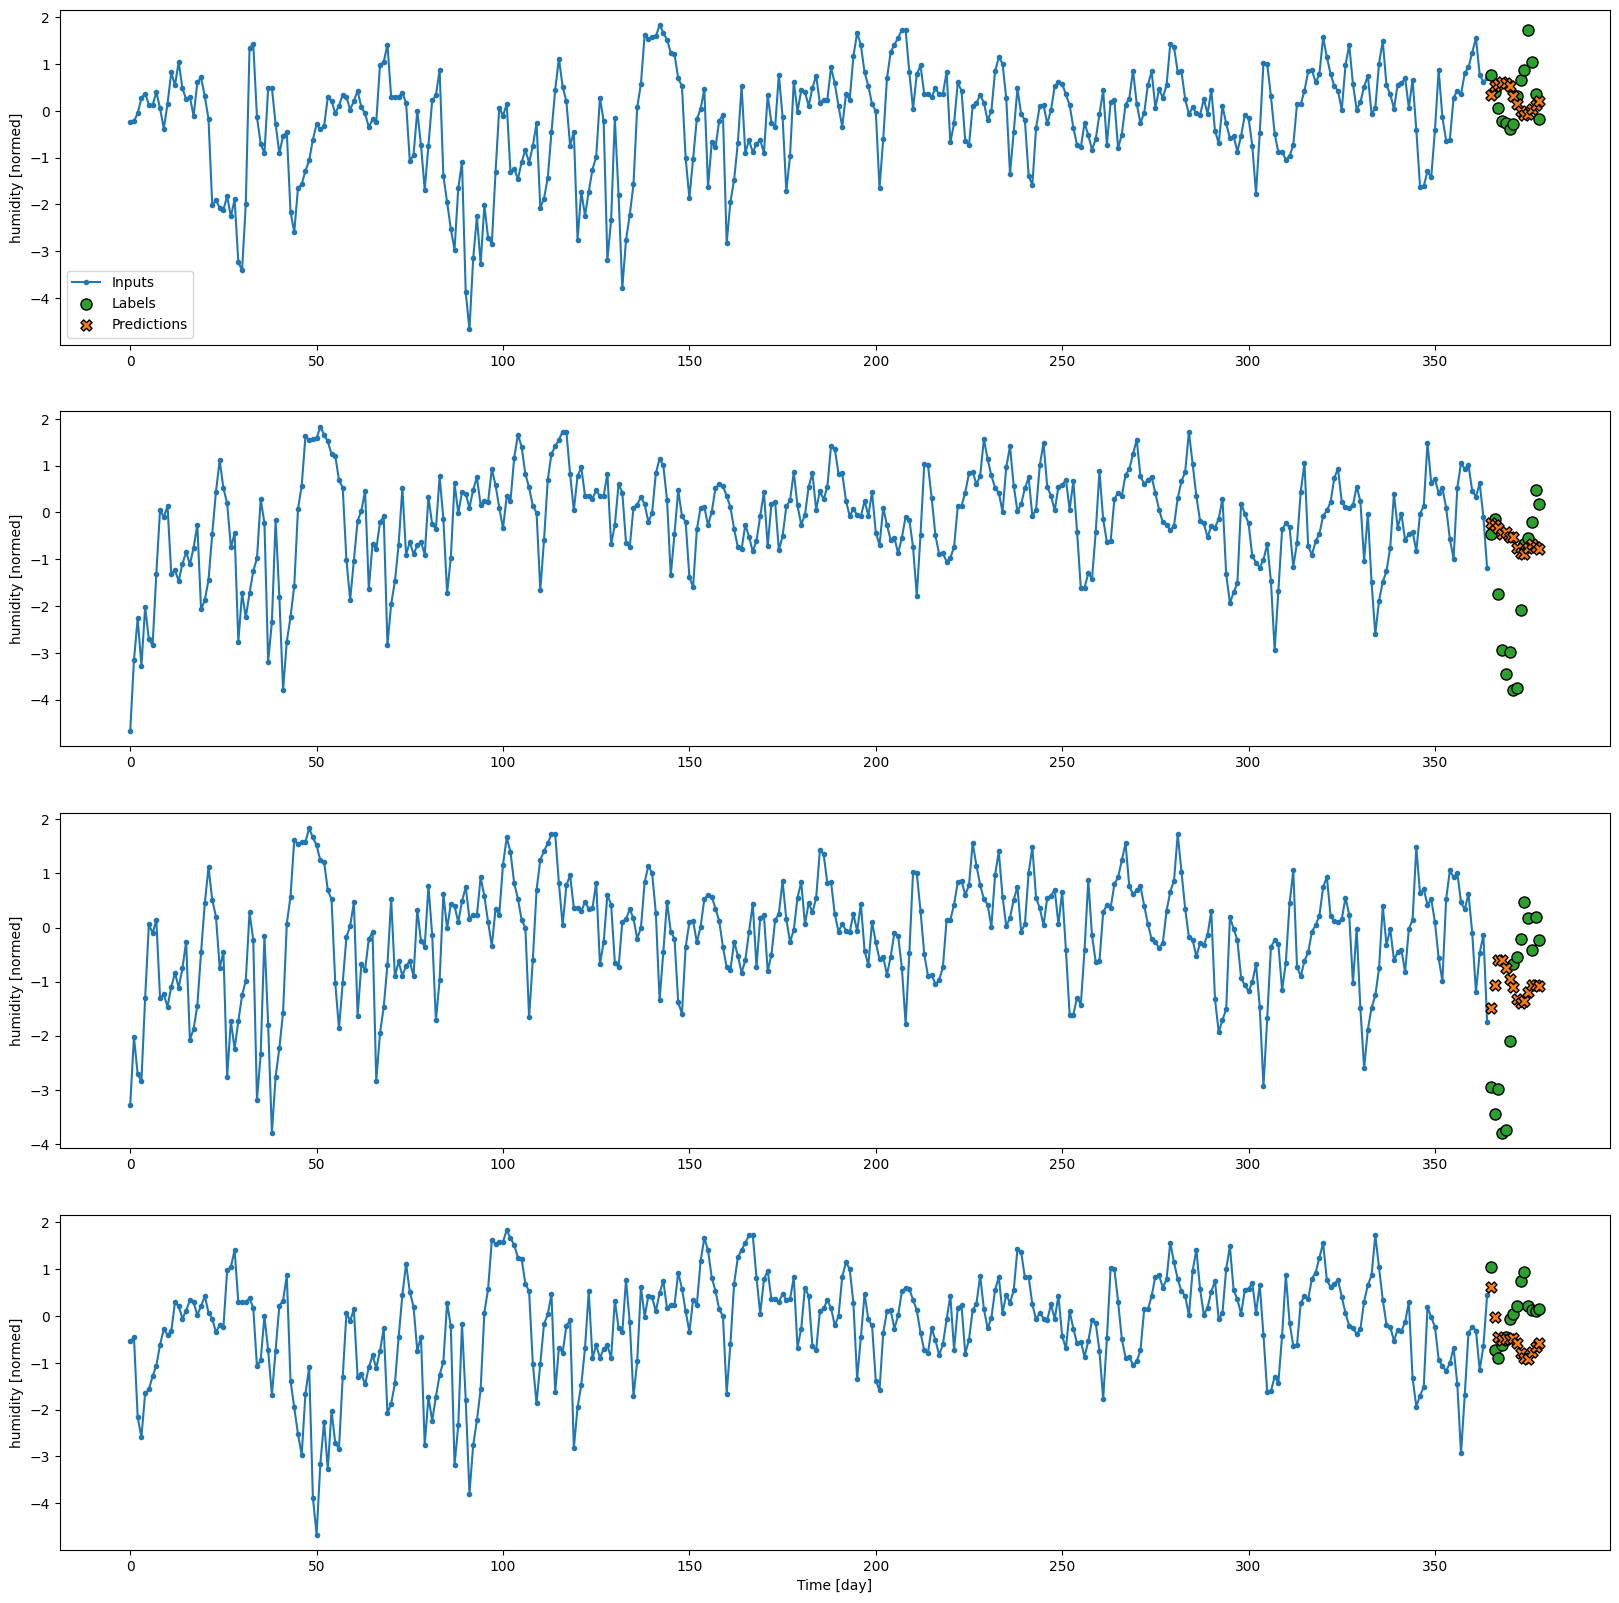

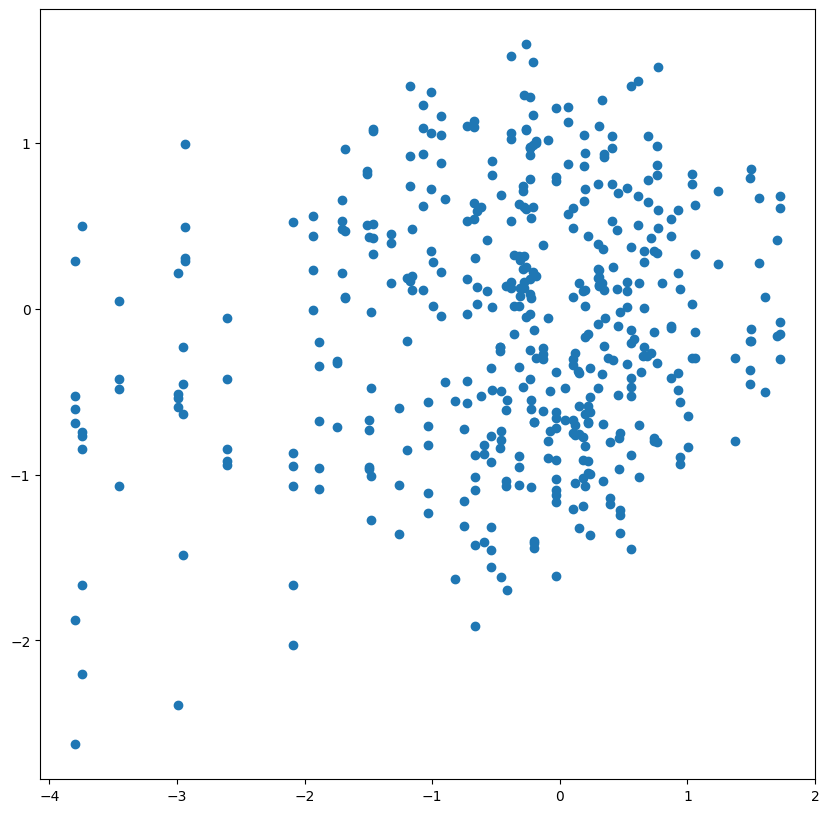

In [23]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(62, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model, plot_col = data_train[0])

Example: 1
MAE
0.64 0.86 0.83 0.72 0.77 0.77 0.81 0.95 1.18 1.28 
CORRELATION
0.53 0.15 0.12 0.20 0.27 0.26 0.28 -0.02 -0.08 -0.07 
Example: 2
MAE
0.50 0.64 0.80 0.90 0.98 1.03 1.03 1.13 1.17 1.38 
CORRELATION
0.62 0.43 0.31 0.07 -0.10 -0.09 -0.21 -0.19 -0.16 -0.16 
Example: 3
MAE
0.74 0.94 1.12 1.12 0.99 1.06 1.07 1.10 1.07 1.13 
CORRELATION
0.69 0.55 0.38 0.32 0.24 0.18 0.14 0.04 -0.13 -0.27 
Example: 4
MAE
0.65 0.72 0.78 1.06 1.08 0.99 1.00 1.12 1.14 1.20 
CORRELATION
0.84 0.50 0.28 0.22 0.27 0.20 0.03 0.07 0.05 -0.13 


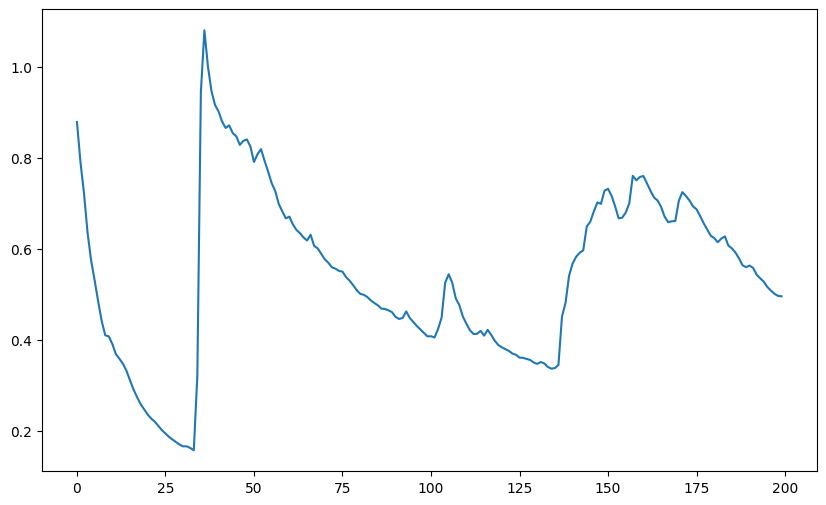

In [24]:
plt.plot(history.history['loss'])
statistic([multi_lstm_model])

In [25]:
# data test
ds_test = tf.keras.utils.timeseries_dataset_from_array(
      data=test_df,
      targets=None,
      sequence_length=multi_window.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=1,)

ds_test = ds_test.map(multi_window.split_window)

temp               24.571862
tempmax            28.073863
tempmin            21.658193
humidity           78.566486
precip              4.850697
windspeed          17.610695
solarradiation    185.161110
solarenergy        15.975808
Year sin           -0.027787
Year cos           -0.016548
dtype: float64
0: [82.2 86.7 88.  91.2 94.4 86.4 84.8 85.6 86.3 82.7 79.2 76.4 75.9 74.7] [78.02469  80.12712  80.74528  81.336914 81.39851  83.548546 85.45758
 86.46503  87.37405  89.17444  90.02349  90.47091  89.58126  88.97553 ]
1: [86.7 88.  91.2 94.4 86.4 84.8 85.6 86.3 82.7 79.2 76.4 75.9 74.7 75.7] [82.60181  83.49007  82.65707  82.18176  81.11238  82.202065 83.35203
 84.04572  83.7881   85.19217  86.45389  85.83906  84.11515  84.55505 ]
2: [88.  91.2 94.4 86.4 84.8 85.6 86.3 82.7 79.2 76.4 75.9 74.7 75.7 81.7] [84.65208  85.77412  85.36231  84.62947  83.712456 85.12716  86.77934
 88.415054 90.92289  93.67219  94.77719  94.02929  91.652855 89.79441 ]
3: [91.2 94.4 86.4 84.8 85.6 86.3 82.7 79.2 

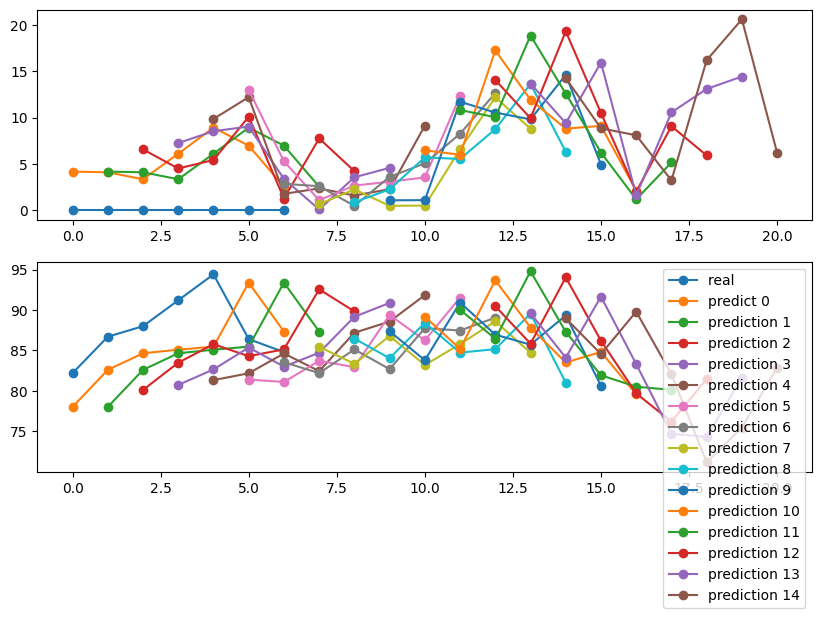

In [26]:
# # date test
# dat_test = tf.keras.utils.timeseries_dataset_from_array(
#       data=date_test,
#       targets=None,
#       sequence_length=multi_window.total_window_size,
#       sequence_stride=1,
#       shuffle=False,
#       batch_size=1,)
# dat_test = dat_test.map(multi_window.split_window)
def unnorm(data, data_train=data_train[0]):
    data_unnorm = (data * train_std[data_train]) + train_mean[data_train]
    return data_unnorm


print(train_mean)
it = iter(ds_test)
num_plot = 1
num_sample = 15
for k in range(0, 2*num_plot, 2):
    for i in range(k*num_sample):
        input, output = next(it)
    input, output = next(it)
    prediction = multi_lstm_model(input)
    output_unnorm = unnorm(output)
    prediction_unnorm = unnorm(prediction)
    data_plot = []
    # data_plot.append(prediction_unnorm[0, :, 0])
    data_output = []
    # data_output.append(output_unnorm[0, :, 0])
    # plt.plot(np.arange(0,10),output_unnorm[0,:,0], label = "real")

    for i in range(7):

        input, output = next(it)

        prediction = multi_lstm_model(input)
        output_unnorm = unnorm(output)
        prediction_unnorm = unnorm(prediction)
        print(f"{i}: {output_unnorm[0, :, 0]} {prediction_unnorm[0, :, 0]}")
        data_plot.append(prediction_unnorm[0, :, 0])
        data_output.append(output_unnorm[0, :, 0])
    #     plt.plot(np.arange(i+1,i+11),prediction_unnorm[0,:,0], label = f"prediction {i+1}")
    data_stack = tf.stack(data_plot)
    data_stack_tranpose = data_stack.numpy().transpose()
    data_stack_out = tf.stack(data_output)
    data_stack_out_trans = data_stack_out.numpy().transpose()
    plt.subplot(num_plot*2, 1, k+1)
    plt.plot(np.arange(0, 7), abs(tf.cast(data_stack_out_trans[0, :], tf.float32) - tf.cast(
        data_stack_out_trans[0, :], tf.float32)), label=f"real ", marker='o')
    plt.plot(np.arange(0, 7), abs(tf.cast(data_stack_tranpose[0, :], tf.float32) - tf.cast(
        data_stack_out_trans[0, :], tf.float32)), label=f"predict 0 ", marker='o')
    # print(data_stack_tranpose.shape[0))
    for i in range(data_stack_tranpose.shape[0]):
        predict_val = tf.cast(data_stack_tranpose[i, :], tf.float32)
        output_val = tf.cast(data_stack_out_trans[i, :], tf.float32)
        plt.plot(np.arange(i + 1, i + 1 + data_stack_tranpose.shape[1]),
                 abs(predict_val - output_val), label=f"prediction {i + 1}", marker='o')
        print(f"{i}: {predict_val} {output_val} {abs(predict_val - output_val)}" )
    plt.subplot(num_plot*2, 1, k+2)
    plt.plot(np.arange(0, 7),
             data_stack_out_trans[0, :], label=f"real ", marker='o')
    plt.plot(np.arange(0, 7), tf.cast(
        data_stack_tranpose[0, :], tf.float32), label=f"predict 0 ", marker='o')
    # print(data_stack_tranpose.shape[0))
    for i in range(data_stack_tranpose.shape[0]):
        plt.plot(np.arange(i + 1, i + 1 + data_stack_tranpose.shape[1]),
                 tf.cast(data_stack_tranpose[i, :], tf.float32), label=f"prediction {i + 1}", marker='o')
        print(f"{i}: {tf.cast(data_stack_tranpose[i, :], tf.float32)} " )
plt.legend(loc='upper right')

ValueError: x and y must have same first dimension, but have shapes (7,) and (14,)

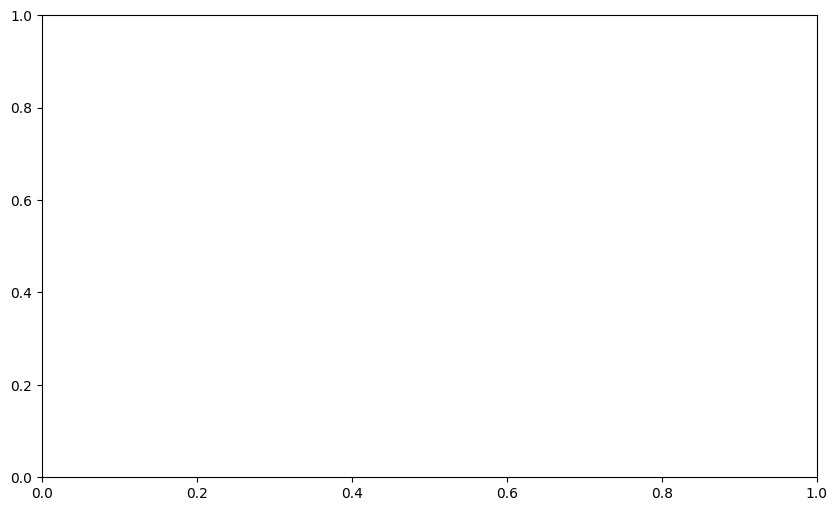

In [27]:
for k in range(num_plot):
    for i in range(k*num_sample):
        input, output = next(it)
    input, output = next(it)
    prediction = multi_lstm_model(input)
    output_unnorm = unnorm(output)
    prediction_unnorm = unnorm(prediction)
    data_plot = []
    data_plot.append(prediction_unnorm[0, :, 0])
    data_output = []
    data_output.append(output_unnorm[0, :, 0])
    # plt.plot(np.arange(0,10),output_unnorm[0,:,0], label = "real")


    
    #     plt.plot(np.arange(i+1,i+11),prediction_unnorm[0,:,0], label = f"prediction {i+1}")
    data_stack = tf.stack(data_plot)
    data_stack_tranpose = data_stack.numpy().transpose()
    data_stack_out = tf.stack(data_output)
    data_stack_out_trans = data_stack_out.numpy().transpose()
    plt.subplot(num_plot,1,k+1)
    plt.plot(np.arange(0, 7),output_unnorm[0,:,0], label = f"real ", marker = 'o')
    plt.plot(np.arange(0, 8),tf.cast(data_stack_tranpose[0, :], tf.float32), label = f"predict 0 ", marker = 'o')
    # print(data_stack_tranpose.shape[0))
    for i in range(data_stack_tranpose.shape[0]):
        plt.plot(np.arange(i + 1, i + 1 + data_stack_tranpose.shape[1]), 
                tf.cast(data_stack_tranpose[i, :], tf.float32), label=f"prediction {i + 1}", marker = 'o')
    plt.legend(loc = 'upper right')


In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)


In [ ]:
multi_window.plot(feedback_model, plot_col=data_train[0])
statistic([feedback_model])

In [ ]:
plt.plot(history.history['loss'])
statistic([multi_conv_model])

In [ ]:
list_models = [multi_linear_model,multi_dense_model,multi_conv_model,multi_lstm_model]
statistic(models = list_models)

In [ ]:
for key,value in multi_performance.items():
    print(f"{key} - Loss: {value[0]}, MAE: {value[1]} ")